<a href="https://colab.research.google.com/github/tapiwamesa/MTN-Nigeria-customer-churn-prediction-model/blob/main/MTN_Nigeria_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Customer retention is a critical aspect of business sustainability and growth. Companies across industries face significant financial impact when customers discontinue their services—commonly referred to as **customer churn**. Identifying customers who are likely to churn in advance can empower businesses to take proactive measures to improve customer satisfaction, tailor engagement strategies and reduce churn rates.

This project aims to develop a **predictive machine learning model** that accurately identifies customers who are at high risk of churning based on their historical behavior, usage patterns, demographic information, and engagement with the service. The objective is to enable data-driven decision-making for customer retention strategies and improve long-term customer value.

# Objectives


1. **To analyze and preprocess customer data** to extract relevant features that influence churn behavior, such as usage patterns, transaction history, demographics and customer service interactions.

2. **To build and evaluate machine learning models** capable of predicting whether a customer is likely to churn, using classification algorithms such as logistic regression, decision trees and random forest.

3. **To compare model performance** using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC, and select the most effective model for deployment.

4. **To provide actionable insights** that support targeted retention strategies by flagging high-risk customers and enabling early intervention.

5. **To create a scalable and deployable solution** that can be integrated into existing business systems for real-time churn prediction and customer relationship management.


# Exploratory Data Analysis

In [1]:
# importing necessary libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mounting the drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# loading the data

mtn = pd.read_csv("/content/drive/MyDrive/Datasets/mtn_customer_churn.csv")
mtn.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


In [4]:
# Column data types
mtn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

There are 974 entries in the mtn data with a total of 17 columns where 1 is of type float, 6 are integers and 10 are of data type object. Object data type columns are those columns that have strings and/or numeric eg Subscription Plan, Customer ID, Full name etc




In [5]:
# Data basic statistics

mtn.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,974.0,48.043121,17.764307,16.00,32.0000,49.00,63.7500,80.0
Satisfaction Rate,974.0,2.947639,1.384219,1.00,2.0000,3.00,4.0000,5.0
Customer Tenure in months,974.0,31.422998,17.191256,1.00,17.0000,31.00,47.0000,60.0
Unit Price,974.0,19196.663244,25586.726985,350.00,5500.0000,14500.00,24000.0000,150000.0
Number of Times Purchased,974.0,10.564682,5.709427,1.00,5.0000,11.00,15.0000,20.0
Total Revenue,974.0,204669.609856,324785.499316,350.00,33000.0000,108000.00,261000.0000,3000000.0
Data Usage,974.0,99.304764,57.739511,0.82,47.6375,103.33,149.6975,200.0


From the info method, there are 7 numeric columns and above are shows with the respective basic statistics.

- The average age of customers as of the period Q1 2025 with the oldest customer(s) being 80 years old and the youngest customer is 16 years old. The 75th percentile tells us that 75% of three quarters of the customers are below the age of 63 years and only 25% of the customers are older than 62 years. The standard deviation looks at how much the age of customers vary from the average age, and this tells us that there is significant variation in the ages where some customers are much younger and some are much older.

- The maximum satisfaction rating is 5, and only 25% of the customers rated the business service above a rating of 4. The average ratings in Q1 2025 is 2.9.

- The youngest customer in Q1 2025 is 1 month old, which means the customer(s) were onboarded in in the same period. The oldest customer in the system is 60 months old, which 5 years with mtn.

- The average unit price of the packages purchased by the subscribers is 19,196.66 naira with the most valuable packed at 150,000 naira. On average the subscribers purchase data 10.5 times in a month generating an average of 204,669.60 naira for the company. This is driven by the upside data usage rates of 99 gigabytes per customer in the period of Q1 2025.

In [6]:
# Slicing the dataframe for plots

# Total revenue
rev_states = mtn[["Total Revenue", "State"]].groupby("State").sum()
rev_states = rev_states.sort_values("Total Revenue", ascending = True).head(5)

# Device usage
dev_counts = mtn["MTN Device"].value_counts().sort_values()

#  Gender Statistics
gender_stats = mtn["Gender"].value_counts().sort_values()

# Customer Churn Statistics
ccs = mtn["Customer Churn Status"].value_counts().sort_values()

# Customer Review
customer_reviews = mtn["Customer Review"].value_counts().sort_values()

# Reasons for customer leaving
churn_reasons = mtn["Reasons for Churn"].value_counts().sort_values()

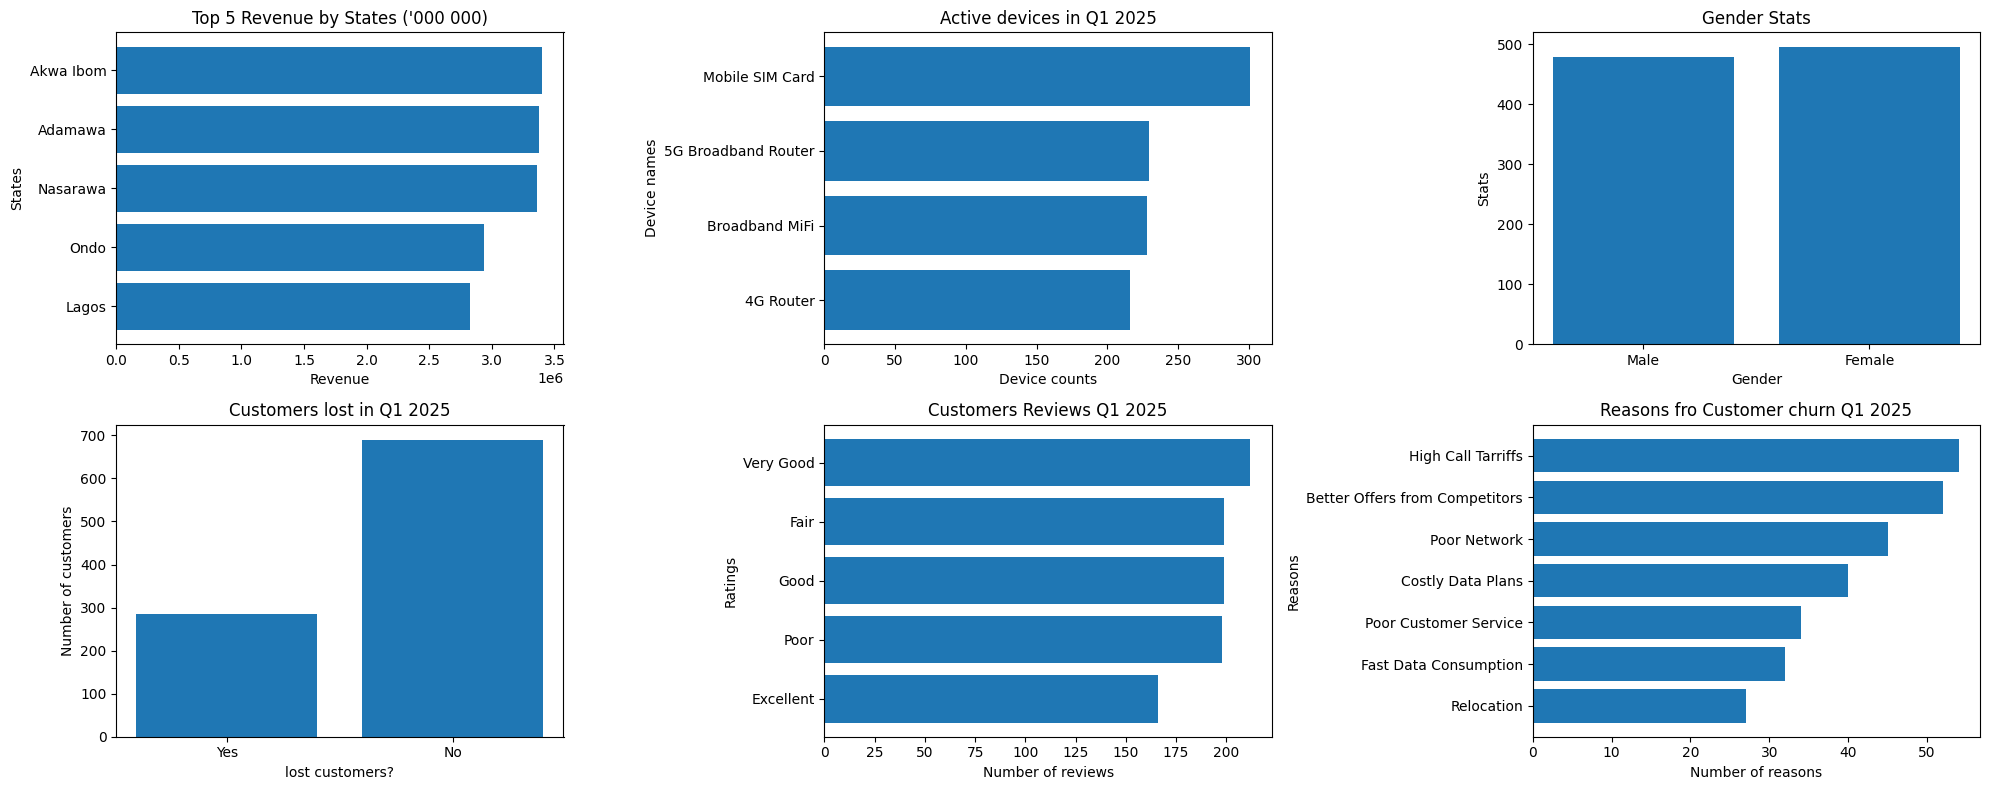

In [7]:

# setting the subplots 2 x 2 grid
fig, axes = plt.subplots(2 ,3, figsize = (20, 8))

# Plotting Revenue by states
axes[0 ,0].barh(rev_states.index, rev_states["Total Revenue"])
axes[0, 0].set_title("Top 5 Revenue by States ('000 000)")
axes[0, 0].set_xlabel("Revenue")
axes[0, 0].set_ylabel("States")

# Plotting the number of devices active in Q1 2025
axes[0, 1].barh(dev_counts.index, dev_counts.values)
axes[0 ,1].set_title("Active devices in Q1 2025")
axes[0 ,1].set_xlabel("Device counts")
axes[0 ,1].set_ylabel("Device names")

# Plotting the gender stats
axes[0 ,2].bar(gender_stats.index, gender_stats.values)
axes[0 ,2].set_title("Gender Stats")
axes[0 ,2].set_xlabel("Gender")
axes[0 ,2].set_ylabel("Stats")

# Plotting customer churn
axes[1, 0].bar(ccs.index, ccs.values)
axes[1 ,0].set_title("Customers lost in Q1 2025")
axes[1 ,0].set_xlabel("lost customers?")
axes[1 ,0].set_ylabel("Number of customers")

# Plotting customer reviews
axes[1, 1].barh(customer_reviews.index, customer_reviews.values)
axes[1 ,1].set_title("Customers Reviews Q1 2025")
axes[1 ,1].set_xlabel("Number of reviews")
axes[1 ,1].set_ylabel("Ratings")

# Plotting reasons for customer churn
axes[1, 2].barh(churn_reasons.index, churn_reasons.values)
axes[1 ,2].set_title("Reasons fro Customer churn Q1 2025")
axes[1 ,2].set_xlabel("Number of reasons")
axes[1 ,2].set_ylabel("Reasons")

plt.tight_layout()
plt.show()

- Plateau raked in the most Revenue in Q1 2025 with 9,463,600 followed by Ekiti state with 9,240,250. The top 5 revenue generators contributed 22% of the total revenue.

- Mobile SIM Card is the most subscribed service with 301 subscribers in the first quarter of 2025, 4G router have the least subscriptions with 216 subscribers. All the services except for Mobile SIM Card as well above 200 subscribers in the quarter.

- Female subscribers make up 51% of the customers and 49% is made of the male gender.

In [8]:
# Top 5 States by Revenue
top5 = mtn[["State", "Total Revenue"]].groupby("State").sum().sort_values("Total Revenue").tail()
top5

,Total Revenue
State,
Edo,7937650
Oyo,8600350
Yobe,8881700
Ekiti,9240250
Plateau,9463600


In [9]:
# Revenue generated by top 5 states
top5.values.sum()

np.int64(44123550)

In [10]:
# % of top 5 Revenue generators to total revenue in Q1 2025

top5.values.sum()/mtn[["State", "Total Revenue"]].groupby("State").sum().sort_values("Total Revenue").values.sum()*100

np.float64(22.133909410769697)

In [11]:
# Lost customers by Gender

mtn[["Gender", "Customer Churn Status"]].value_counts().groupby(["Gender", "Customer Churn Status"]).sum()

Gender  Customer Churn Status
Female  No                       345
        Yes                      150
Male    No                       345
        Yes                      134
Name: count, dtype: int64

The company lost more female customers in Q1 2025 than males, having retained 345 from both genders 150 females left the company whilst 134 males left.

In [12]:
# Breakdown of lost customers by gender
lost = mtn[["Gender","Reasons for Churn"]].value_counts().groupby(["Gender","Reasons for Churn"]).sum()
lost

Gender  Reasons for Churn             
Female  Better Offers from Competitors    22
        Costly Data Plans                 16
        Fast Data Consumption             16
        High Call Tarriffs                32
        Poor Customer Service             24
        Poor Network                      28
        Relocation                        12
Male    Better Offers from Competitors    30
        Costly Data Plans                 24
        Fast Data Consumption             16
        High Call Tarriffs                22
        Poor Customer Service             10
        Poor Network                      17
        Relocation                        15
Name: count, dtype: int64

High call tarrifs was the biggest driver for females leaving the company followed by  Poor Network connections. A few females customers left due to relocation. Better Offers from cmpetitors and Costly Data Plans drove more males away from using MTN network.

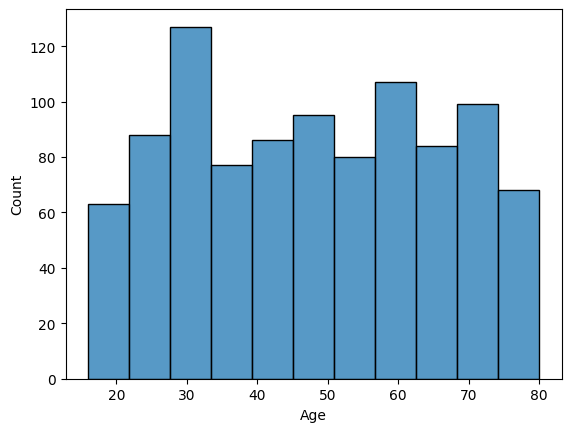

In [13]:
# Distribution of Age of the customers

sns.histplot(mtn["Age"])
plt.show()

The histplot above shows the age distribution amongst the MTN Nigeria customers in Q1 2025 with an outstanding composition of the young people in the 25 to 35 age group dominating.

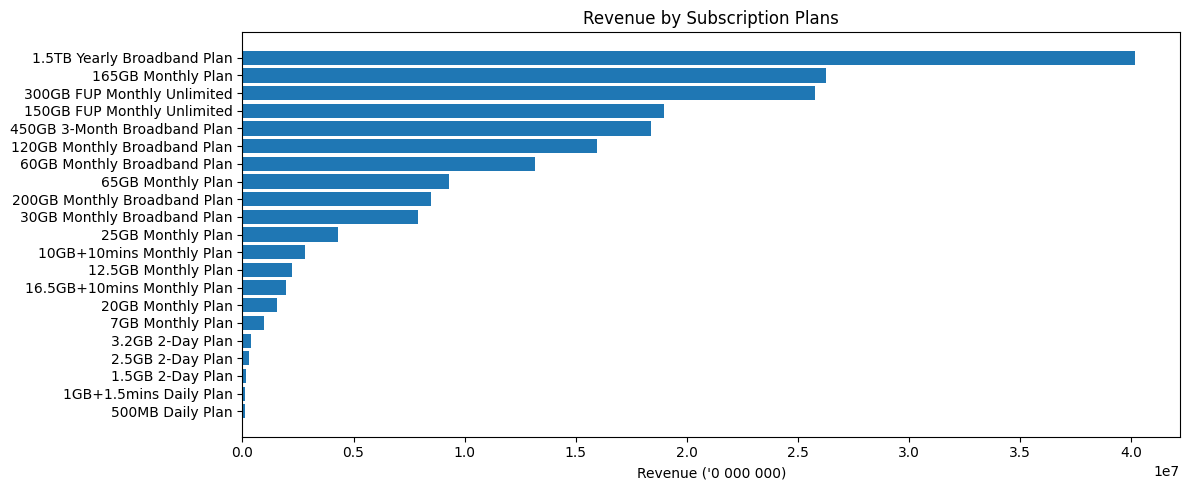

In [14]:
# Slicing mtn dataframe for subscription plans revenue for Q1 2055
plans = mtn[["Subscription Plan", "Total Revenue"]].groupby("Subscription Plan").sum().sort_values("Total Revenue", ascending = True)

# Plotting the revenue generation by subscription plan
plt.figure(figsize = (12, 5))
plt.barh(plans.index.to_list(), plans["Total Revenue"])
plt.title("Revenue by Subscription Plans")
plt.xlabel("Revenue ('0 000 000)")
plt.tight_layout()
plt.show()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN
